# Global Power Plant Database

In [128]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [129]:
# Reading the csv file from dataset
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv") 
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [130]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the above cell we get the information about the dataset which includes indexing type, column type, no-null values and memory usage . from this we can notice the presence of null-values.


In [132]:
# Exploratory Data Analysis(EDA)

In [133]:
# checking the dimension of dataset
df.shape

(907, 27)

In [134]:
# checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

So here we can see the dataset contains different features with different data types. Here there are two types of data namely object type and float64 data type . We will take care of the object datatype using encoding techniques later.

In [135]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

from the above cell we can check the no. of unique values present in each columns.

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data-source have only 1 unique value. Aslo other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

In [136]:
# checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [137]:
#There is only 1 country in th edataset wo we can drip this as it has nothing to do with our prediction also we can drop the column country_long on this basis

df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [138]:
# dropping irrelavant columns
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)


In [139]:
# checking the count of name
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [140]:
#Here we can observe that the name column has unique name for each power plant so dropping this column is good to go.

df.drop(['name'],axis=1,inplace=True)

In [141]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column Owner has more than 65% of null values also it may not important for prediction, so we can drop it

In [142]:
df.drop('owner',axis=1,inplace=True)
#The column url also have no relation with the targets and it has nothing to do with prediction so we can drop it as well.

In [143]:
df.drop('url',axis=1,inplace=True)


In [144]:
df.drop('generation_gwh_2019',axis=1,inplace=True)
df.drop('generation_gwh_2013',axis=1,inplace=True)

In the above cells we dropped the columns which are irrelavent and may not required for our prediction.


In [145]:
# checking the null values in the dataframe
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

<AxesSubplot:>

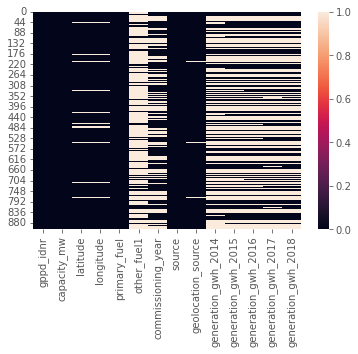

In [146]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

So here we can easily see the white lines in the heatmap which indicates the missing values in the dataset.

In [147]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

# Treating null values using imputation technique.
Most of the columns have missing values except the target variables and the feature source.

In [148]:
#The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers
# let's check the mean of the latitude
df['latitude'].mean()       # we can replace the null values using this mean

21.19791811846691

In [149]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.


In [150]:
# let's check the mode of other_fuel1
df['other_fuel1'].mode()          # we can fill the null values using this code


0    Oil
dtype: object

In [151]:
# let's check the mode of geolocation_source column
df['geolocation_source'].mode()       # we can fill the null values using this mode

0    WRI
dtype: object

So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns .Let's fill the null values of categorical columns by their respective modes.

In [152]:
# Replacing the null value by its mode Oil
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [153]:
# filling null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])


_ The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method

In [154]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [155]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())


In [156]:
# let's check the null values if there any
df.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now we have removed all the null values using imputation method and the data is now clean. So we can move further.


<AxesSubplot:>

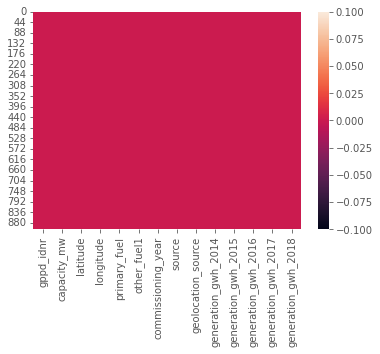

In [157]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

In [158]:
# checking how many columns are there in the dataset
df.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [159]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [160]:
# ckecking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [161]:
# checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [162]:
# checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [163]:
# let's extract power plant age from commissioning year by subtraction it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [164]:
# let's check the data frame 
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [165]:
# checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


In [166]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


In [167]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


So these are the categorical columns in the given dataset

In [168]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


In the above cell all the columns are numerical present in the dataset.

# Data Visualization
Univariate Analysis
Plotting categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


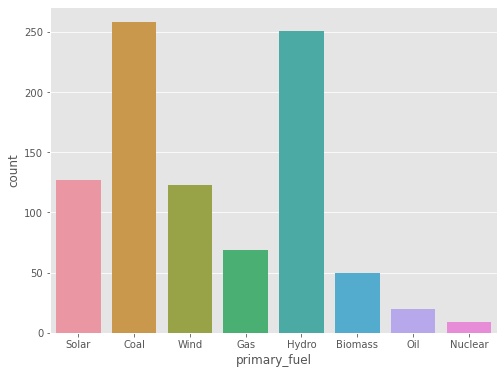

In [169]:
# Visualizing  the types of fuel in primary_fuel
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['primary_fuel'])
plt.show()

In the above cell the count plot shows the energy source used in primary electricity generation. Here using the source Coal(thermal) generates more electricity followed by Hydro(water) . Also the energy source Nuclear generates very less electricity compare to other.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


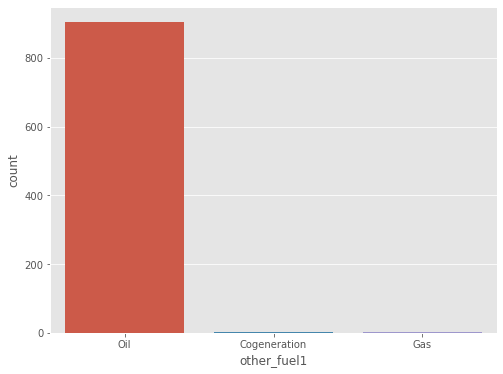

In [170]:
# visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show()

Here we can see there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas.


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


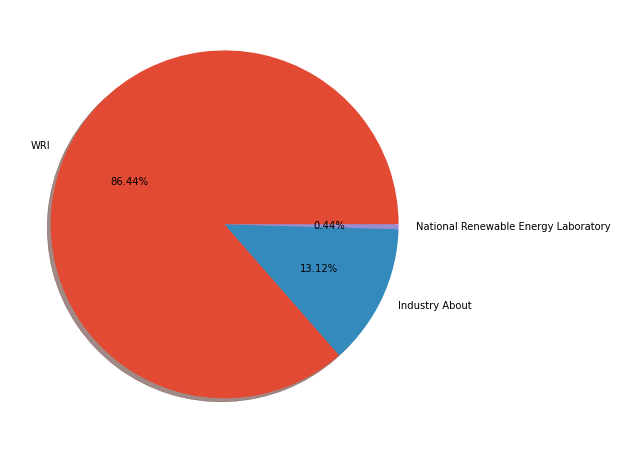

In [171]:
#Visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

As in the above cell the plot shows that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

# Distribution of skewness
Plotting Numerical Columns

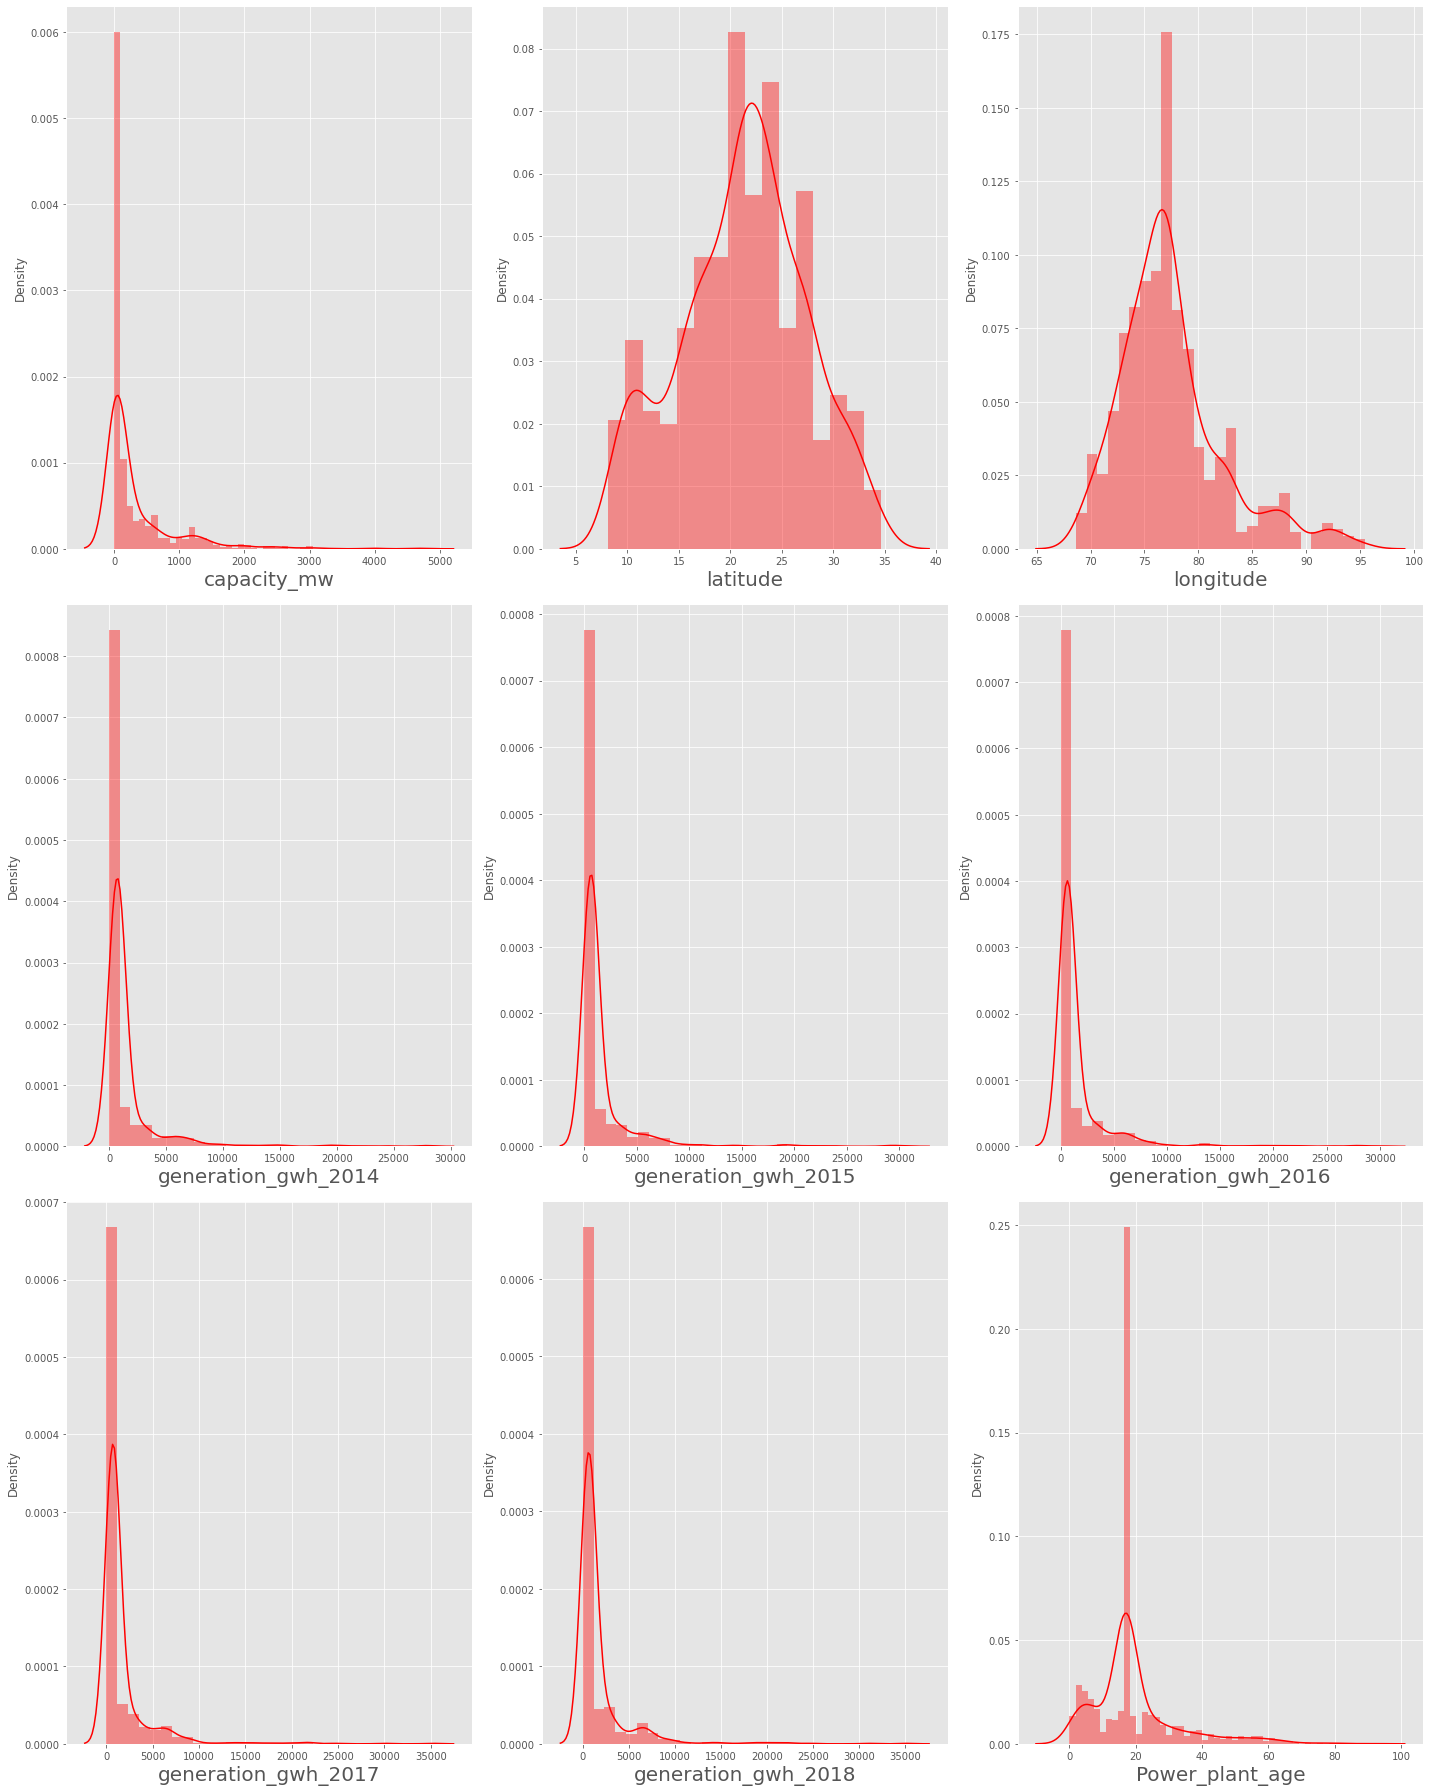

In [172]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation :-

- From the above distribution plots we can observe that the data is not normally distributed in all the columns except   latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove these skewness in all the coluns except the label in the later part.

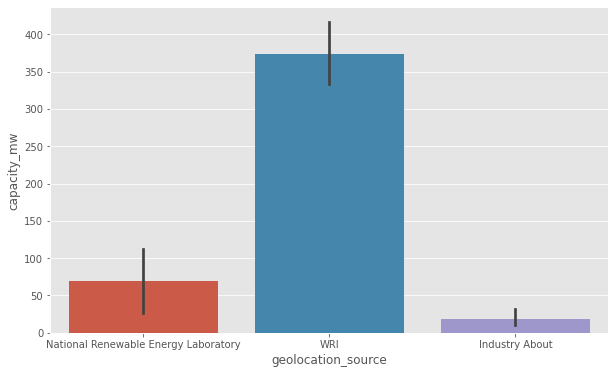

In [173]:
#Comparing target varibale capacity_mw with features

# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity


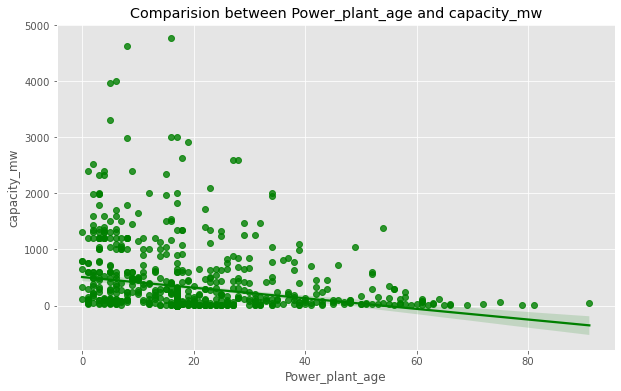

In [174]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'g');

From the above plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.


<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

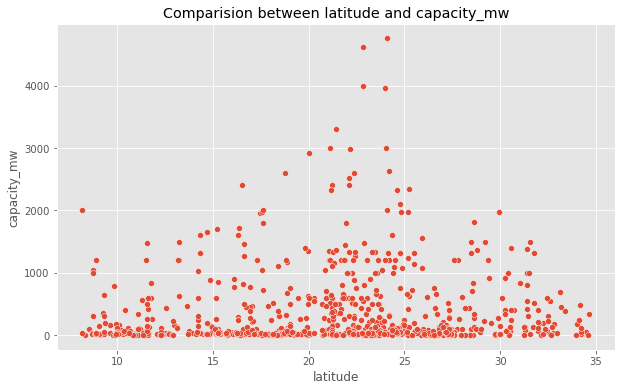

In [175]:
# let's check how the capacity is related to latitude  of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

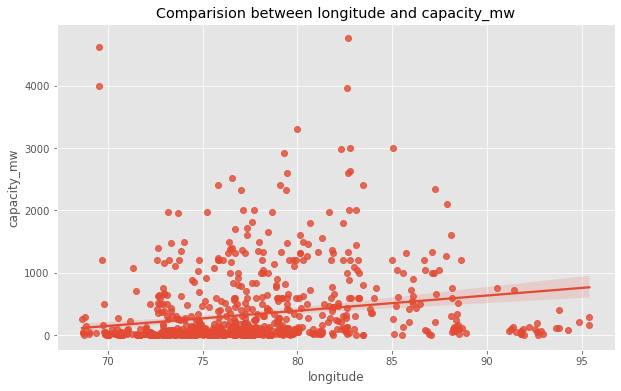

In [176]:
# let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw']);

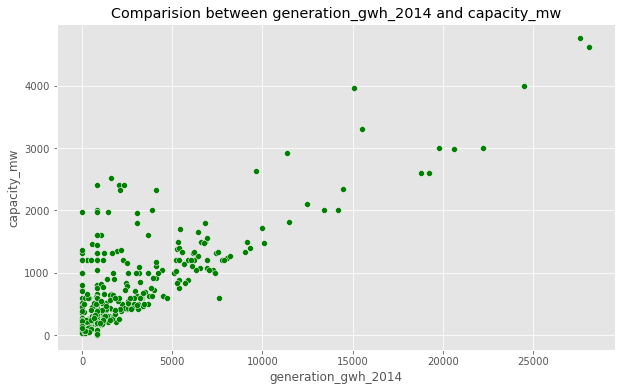

In [177]:
# let's check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title('Comparision between generation_gwh_2014 and capacity_mw')
sns.scatterplot(x = 'generation_gwh_2014', y = 'capacity_mw', data = df,color='g')
plt.show()

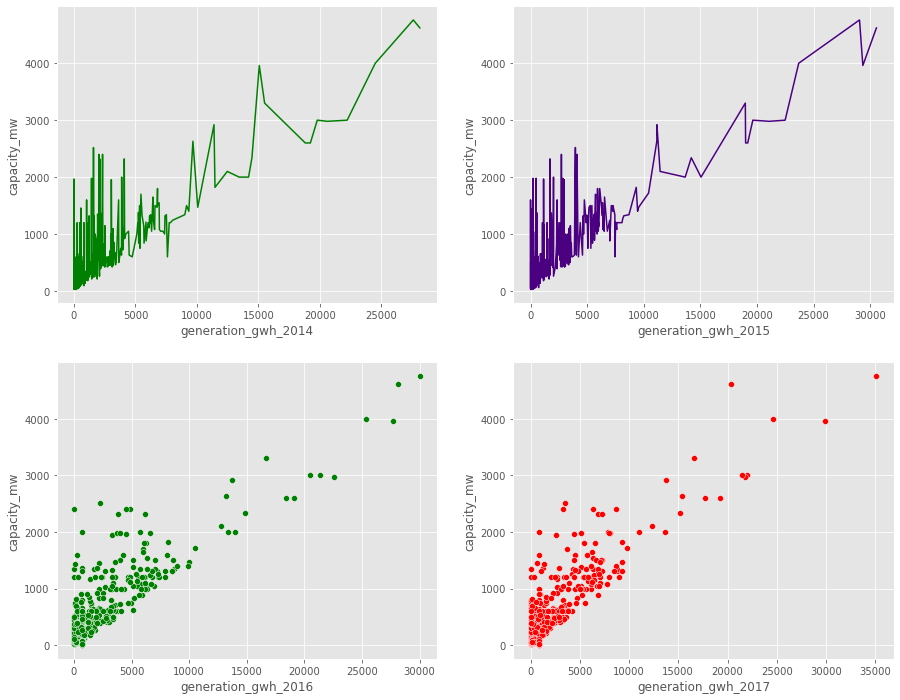

In [178]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='g')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

Observation :-

- There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows how the electricity generation reported for the years 2014 , 2015, 2016, 2017 have high capacity of above 1000mw . Also power generation growrh is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant is also increasing moderately.

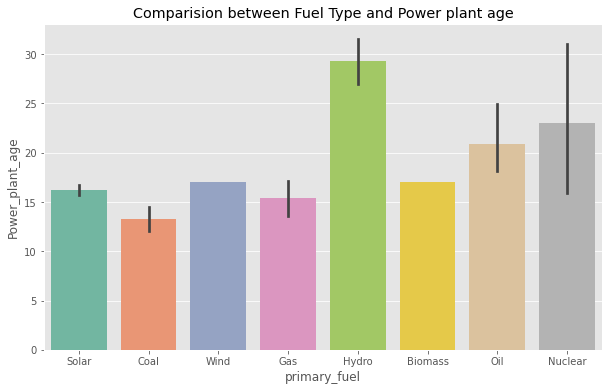

In [179]:
##Comparing the target variable Fuel Types with other features

# Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x='primary_fuel',y='Power_plant_age', data=df,palette='Set2')
plt.show()

From the above cell we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
The power plants which are recently constructed uses Solar, Coal and Gas to gererate the power


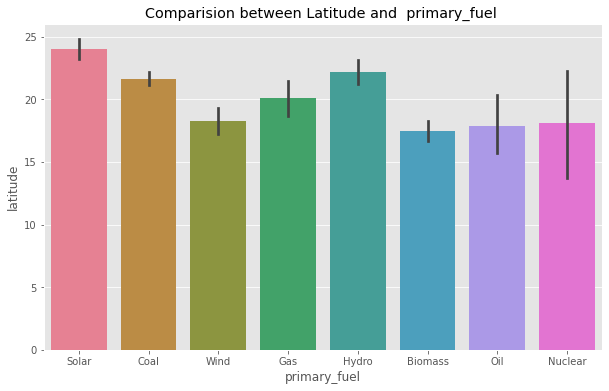

In [180]:
# Lets check how the fuel type is related to latitude of the power plant 
plt.figure(figsize = (10,6))
plt.title("Comparision between Latitude and  primary_fuel ")
sns.barplot(df['primary_fuel'],df['latitude'],palette='husl');

So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

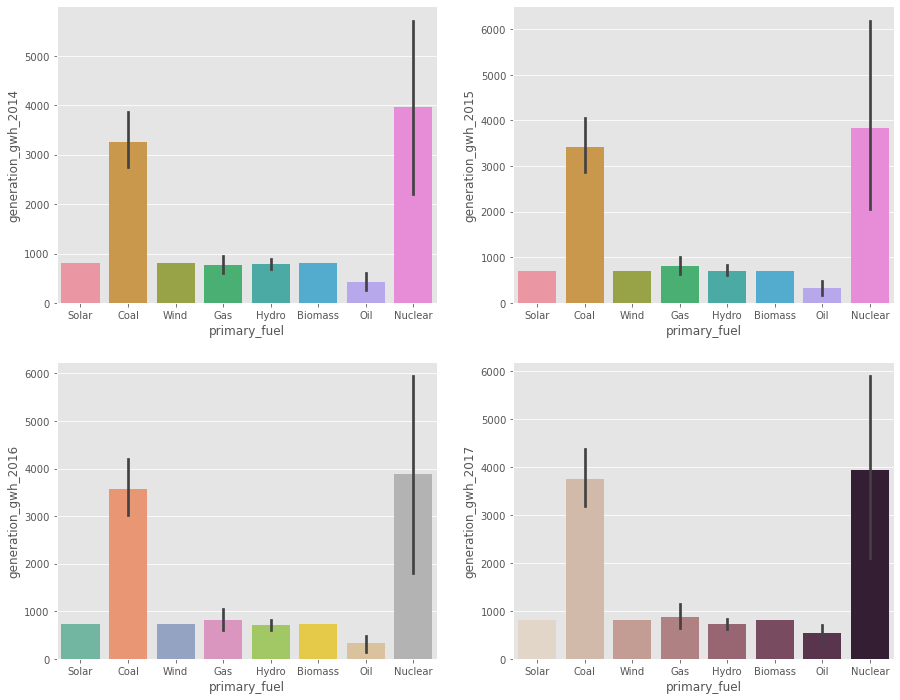

In [181]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# checking attrition level in hourlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# checking attrition level in Monthlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# checking attrition level Monthlyincome
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
Other fuel types have very less power generation reports.

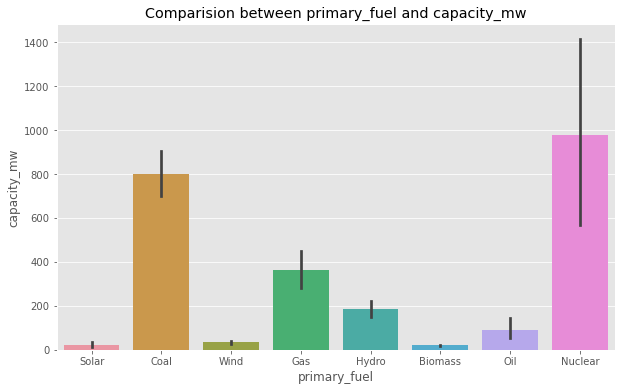

In [182]:
#Checking the relation between targets

# let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x= 'primary_fuel',y = 'capacity_mw',data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

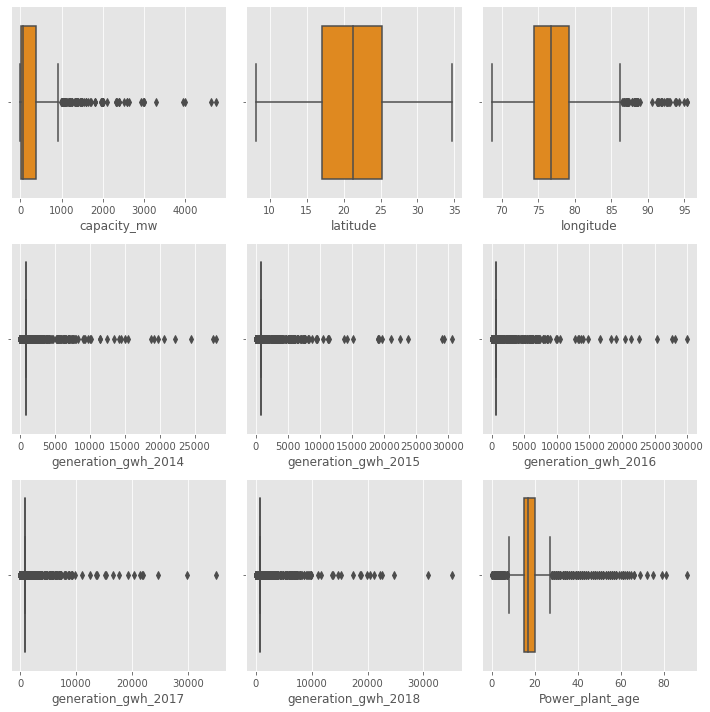

In [183]:
#Outliers Handling

# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.
Let's remove outliers using ZSCORE method.

In [184]:
#Removing Outliers

#ZSCORE method

# features containing outliers
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]
#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [185]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [186]:
df.shape

(907, 14)

In [187]:
new_df.shape

(851, 14)

In [188]:
# checking the data loss
data_loss = (907-851)/907*100
data_loss

6.174200661521499

Here We are losing only 6% of data by removing outliers using zscore.

In [189]:
#Encoding the categorical columns using Label Encoding

categorical_col = ['primary_fuel', 'other_fuel1','source','geolocation_source']

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

#SO here encoding the categorical columns using label encoder.

In [190]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


In [191]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


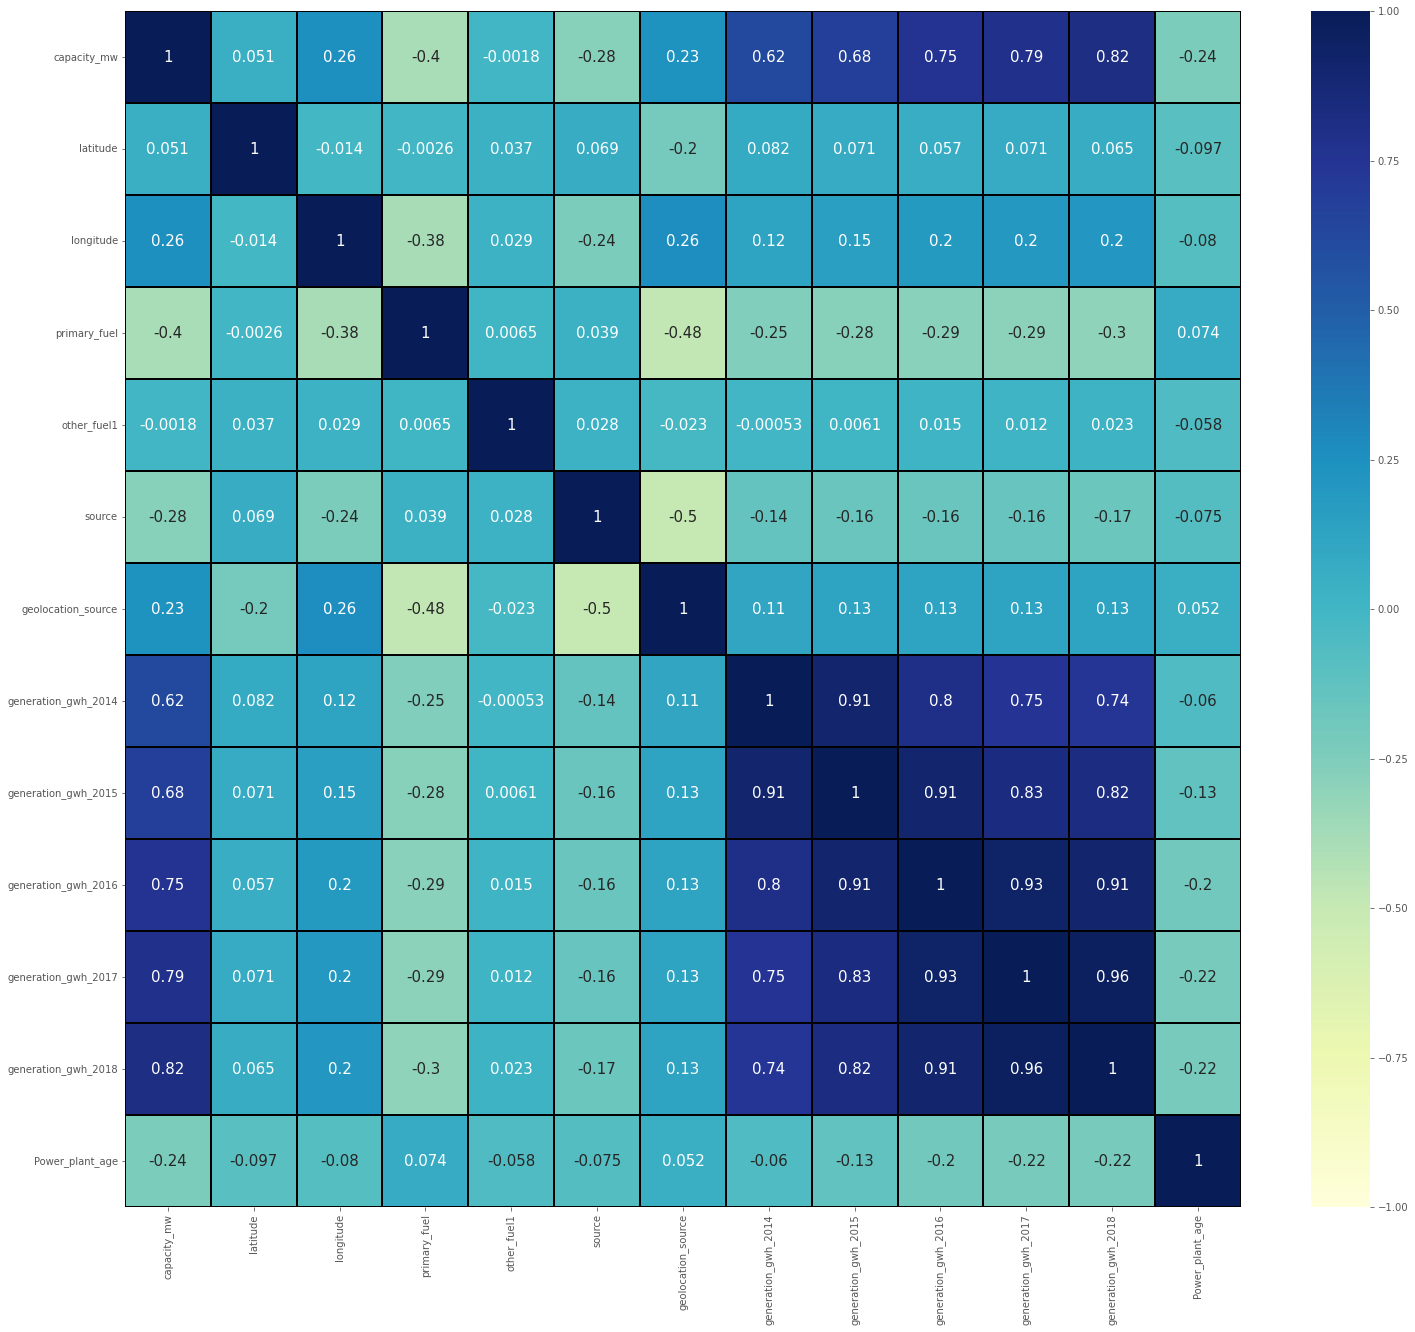

In [192]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

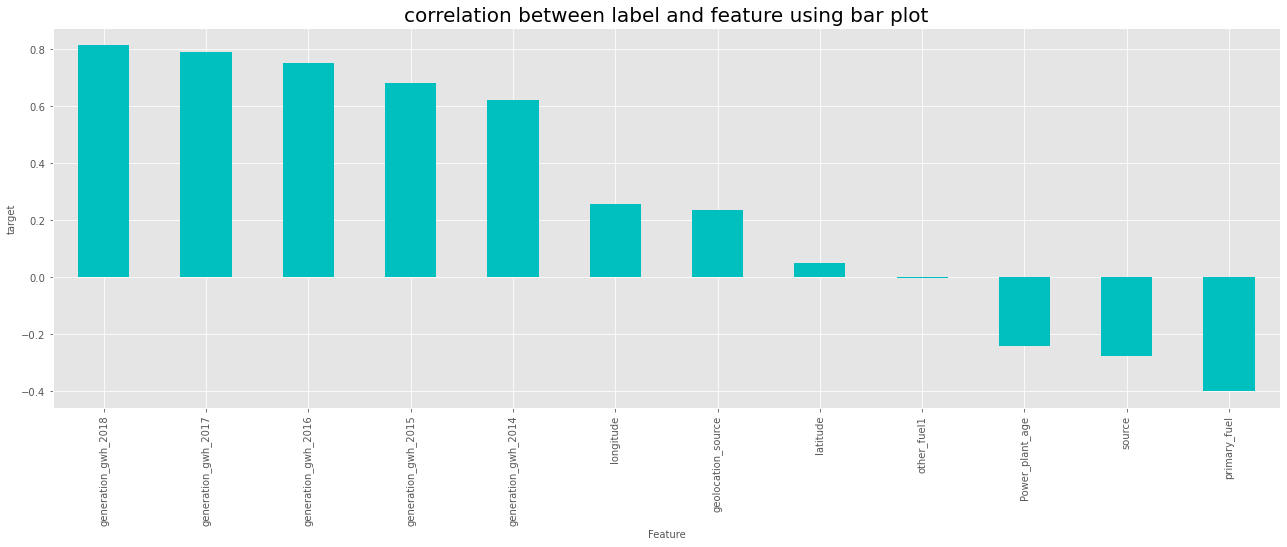

In [193]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

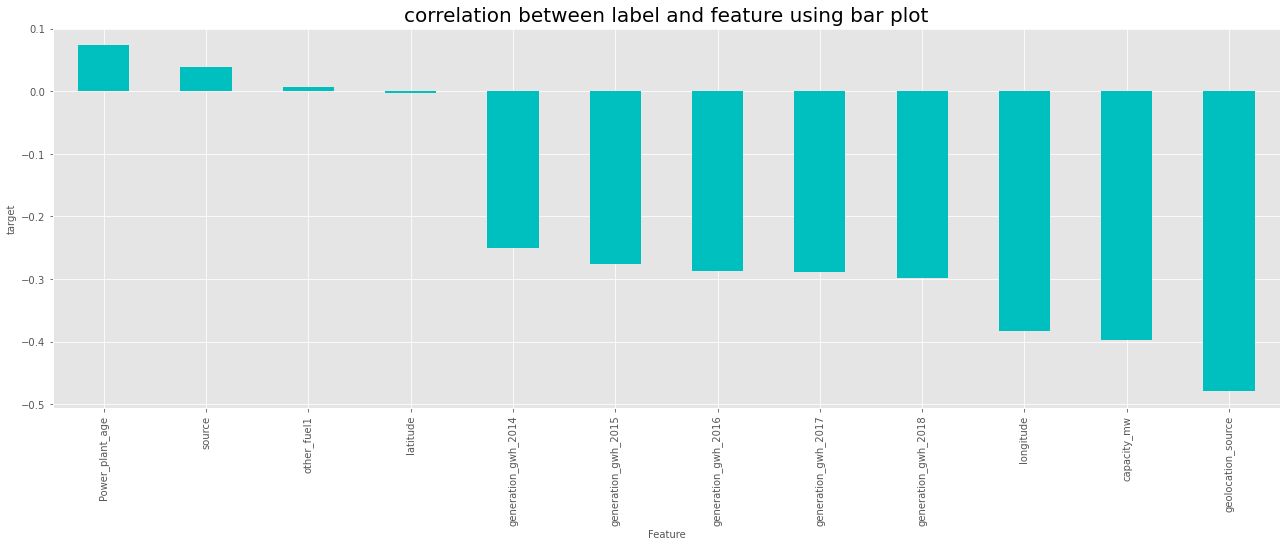

In [194]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [195]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)


In [196]:
new_df.drop('gppd_idnr',axis=1,inplace=True)

In [197]:
new_df.head()


,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# 1. Prediction for capacity_mw


In [198]:
#Separating the features and label variables into x and y

In [199]:
x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [200]:
x.shape


(851, 10)

In [201]:
y.shape

(851,)

In [202]:
#Checking for SKEWNESS
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [203]:
# Removing skewness using yeo_johnson method


In [204]:
skew = ['longitude','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [205]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,0.409046,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [206]:
# checking skewness after using yeo-johnson method
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.039798
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

In [207]:
#SO here successfully removed the skewness from all the numerical columns using yeo-johnson method.


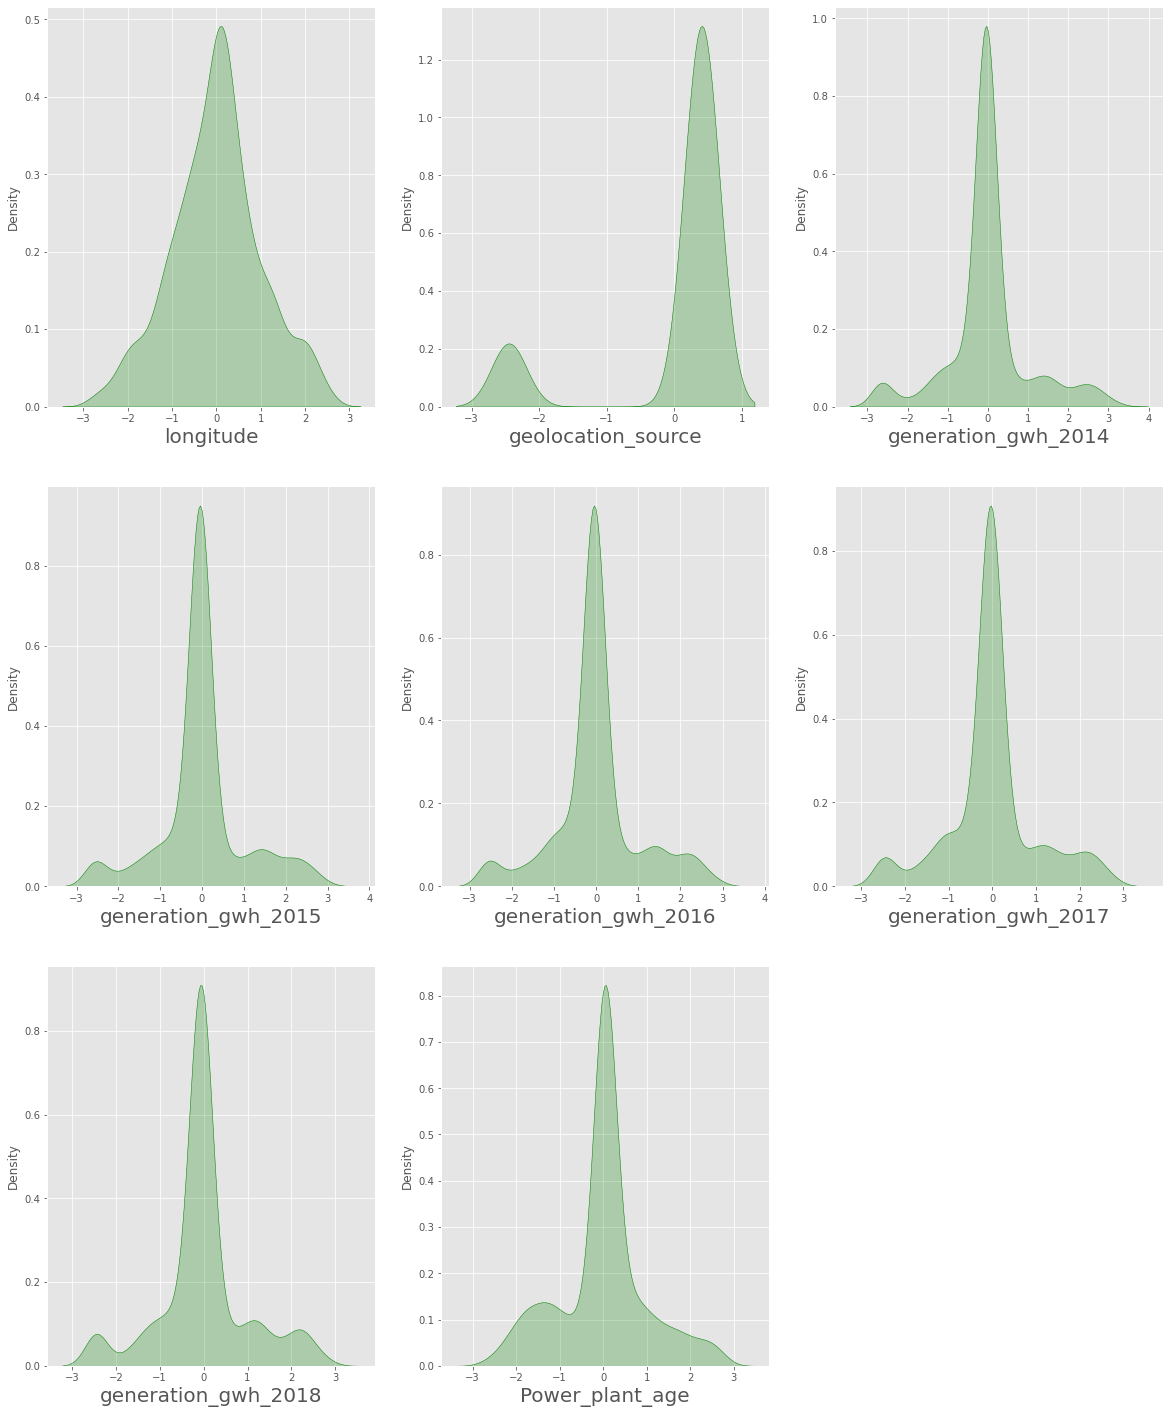

In [208]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [209]:
#The data is not normal but the skewness has been reduced in all the columns

In [210]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.409046,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.409046,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.451124,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [211]:
#Checking VIF (Variance Inflation Factor ) Values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.309950,longitude
1,1.690517,primary_fuel
2,1.512846,source
3,1.897701,geolocation_source
4,3.603414,generation_gwh_2014
5,6.182253,generation_gwh_2015
6,9.957460,generation_gwh_2016
7,9.750138,generation_gwh_2017
8,8.951470,generation_gwh_2018
9,1.104511,Power_plant_age


SO here we can observe all the columns have VIF less than 10 .

Which means we are free from multicolinearity problem .
Let's move to building machine learning models.


In [212]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.409046,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In the above cell we can see the dataframe after cleaning and preprocessing.

Here We have done with the preprocessing and data cleaning .
-Now let's move to build the model.

# modeling

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [214]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8642518594568349  on Random_state  185


#So here we are getting the maximum R2 Score as 86% on the Random State 185

In [215]:
#Creating new train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


In [216]:
#Regression Algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [217]:
#Random Forest Regressor

# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.8721874391134542
MAE: 80.57985529533204
MSE: 24147.0096802009
RNSE: 155.39308118510584


The R2 score value for Random Forest Regressor model is 87%

In [218]:
#Decision Tree Regressor

# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.6807536119840201
MAE: 116.80607617187499
MSE: 60313.67784449512
RNSE: 245.5884318214014


The R2 score value for Random Forest Regressor model is 68%

In [ ]:
#Checking the cross validation score

In [219]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.7793052957499926
0.5704164492412314


In [220]:
#Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [221]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [222]:
capacity = RandomForestRegressor(criterion='mse',max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 155.39308118510584
R2_Score: 87.52449861034431


After tuning the model we are getting R2 Score as 87% for Random Forest Regressor. which is good.

In [223]:
#Saving the Model
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

# 2. Prediction for primary_fuel

In [225]:
#Separating the features and label variables into x_df and y_df
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [226]:
x_df.shape


(851, 10)

In [227]:
y_df.shape

(851,)

In [228]:
#Checking for Skewness
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [229]:
#Removing Skewness using yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [230]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677389,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,0.220284,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-0.274381,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,0.391670,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.731859,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.758384


In [231]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

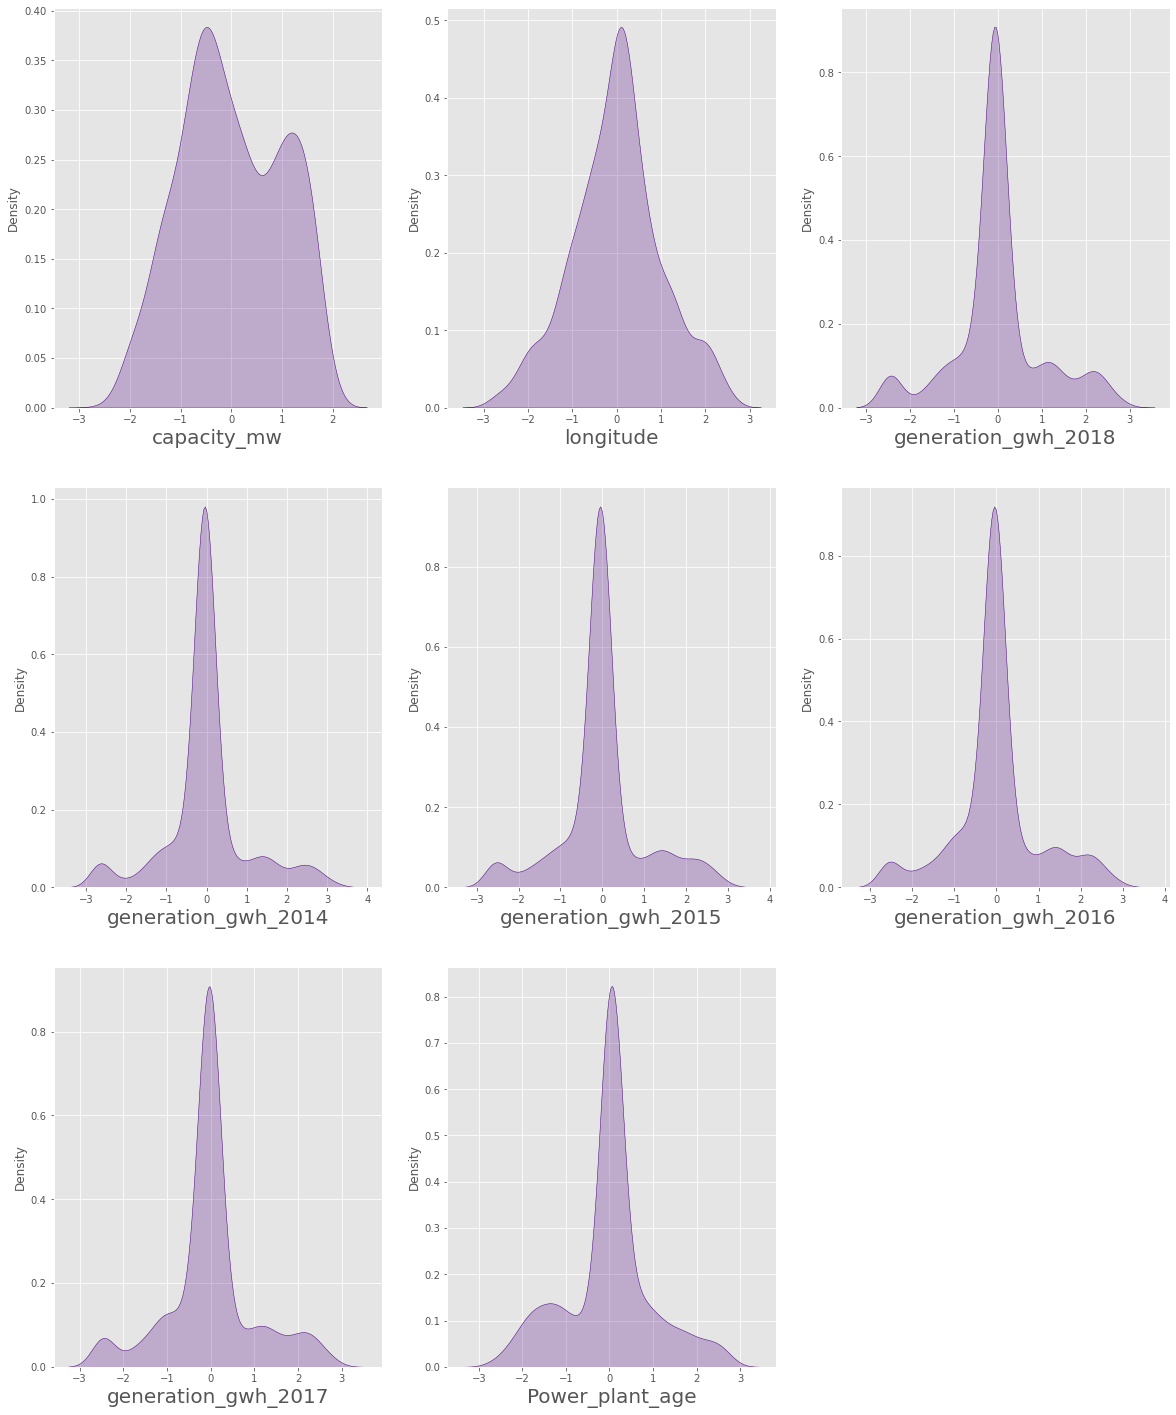

In [232]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [234]:
#Checking VIF values
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


In [235]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

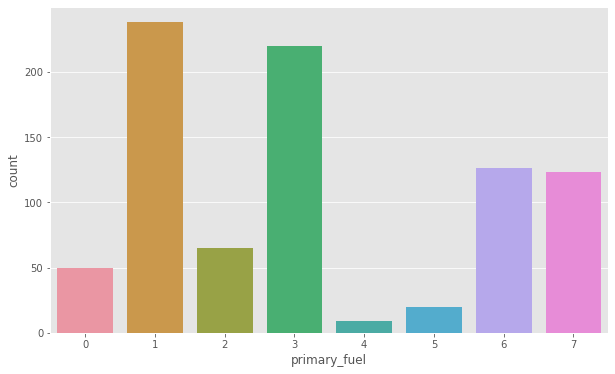

In [239]:
# visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

In [241]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [242]:
#Finding the best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8359375  on Random_state  167


In [243]:
#Creating train_test_split
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [245]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.83203125
[[ 9  6  0  0  0  0  0  0]
 [ 0 55  4  7  4  0  0  1]
 [ 1  6  6  1  0  0  0  0]
 [ 0  5  1 67  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 0  1  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.71      0.77      0.74        71
           2       0.50      0.43      0.46        14
           3       0.89      0.91      0.90        74
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.98      0.99        42
           7       0.97      1.00      0.98        32

    accuracy                           0.83       256
   macro avg       0.72      0.65      0.67       256
weighted avg       0.84      0.83      0.83       256



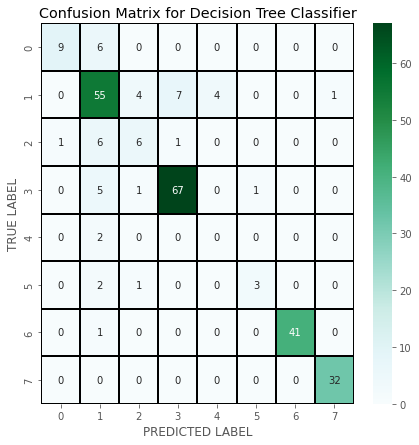

In [246]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [247]:
#Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))


0.84375
[[10  5  0  0  0  0  0  0]
 [ 0 60  3  6  0  0  0  2]
 [ 1  5  4  4  0  0  0  0]
 [ 0  7  1 66  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.75      0.85      0.79        71
           2       0.36      0.29      0.32        14
           3       0.87      0.89      0.88        74
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       1.00      1.00      1.00        42
           7       0.94      1.00      0.97        32

    accuracy                           0.84       256
   macro avg       0.73      0.63      0.65       256
weighted avg       0.84      0.84      0.83       256



The Random Forest Classifier has accuracy 84

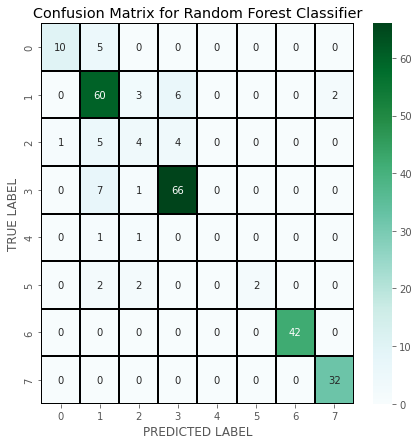

In [248]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [250]:
#Support Vector Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.72265625
[[ 6  4  0  0  0  0  0  5]
 [ 5 56  2  4  0  0  0  4]
 [ 1  6  2  4  0  0  0  1]
 [ 0 17  0 49  0  0  0  8]
 [ 0  2  0  0  0  0  0  0]
 [ 0  4  1  1  0  0  0  0]
 [ 0  2  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.62      0.79      0.69        71
           2       0.40      0.14      0.21        14
           3       0.84      0.66      0.74        74
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        42
           7       0.64      1.00      0.78        32

    accuracy                           0.72       256
   macro avg       0.50      0.49      0.48       256
weighted avg       0.71      0.72      0.70       256



The accuracy usin SVC is 72

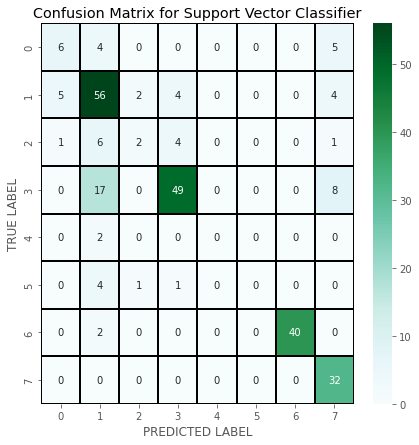

In [251]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Support Vector Classifier")
plt.show()

In [252]:
#Checking the Cross Validation Score

from sklearn.model_selection import cross_val_score

# cv scor for Decision Tree Classifier
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())


0.7920261437908496


In [253]:
# cv scor for Random Forest Classifier
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())

0.822579979360165


In [256]:
#Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
GCV.fit(x_df_train,y_df_train)
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [257]:
fuel_type =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='log2', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

84.765625


#Plotting ROC and compare AUC for the final model
 
 Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.


In [261]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train,y_df_train).predict_proba(x_df_test)

# Binarize the output
y_df_test_bin = label_binarize(y_df_test, classes[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i],_=roc_curve(y_df_test_bin[:,i],y_score[:,i])
    roc_auc[i] = auc(false_positive_rate[i],true_positive_rate[i])
    
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc='lower right')
plt.show()

NameError: name 'classes' is not defined

In [262]:
#Saving the Model
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']